# Week 5 Self Check Questions

Question 1:

Determine the $2\times 2$ matrix $Q$ that rotates a vector by an angle $\theta$. Is this matrix orthogonal? Show that $Q^{-1}$ is identical to the matrix that rotates vectors by an angle of $-\theta$.

Solution:
    
The rotation matrix is given as follows:

$$
Q = 
\begin{bmatrix}
\cos\theta & -\sin\theta\\
\sin\theta & \cos\theta
\end{bmatrix}
$$

The matrix $Q$ is orthogonal since $Q^TQ=I$. The rotation matrix for the angle $-\theta$ is obtained as

$$
\hat{Q} =
\begin{bmatrix}
\cos\theta & +\sin\theta\\
-\sin\theta & \cos\theta
\end{bmatrix},
$$

which is just the transpose of $Q$. Hence, as expected the inverse of $Q$ is just the rotation by $-\theta$.

Question 2:
    
Let $u\in\mathbb{R}^n$ with $\|u\|_2=1$. Define $P=uu^T$. Show that $P=P^2$. Is $P$ an orthogonal matrix? Describe what $P$ is doing. Matrices that satisfy $P=P^2$ are also called projectors.

We have

$$
P^2 = uu^Tuu^T = uu^T
$$

since $u^Tu = 1$.

$P$ is not orthogonal since it is singular. If $v\bot u$ then $Pv = 0$. $Px$ is the projection of a vector $x$ along $u$, that is it cancels out all components of $x$ orthogonal to $u$.

Question 3:
    
Let $P=P^2$ be a projector satisfying $P=P^T$. Show that $Q=I-2P$ is an orthogonal matrix. Give a geometric interpretation of $Q$.

Solution:
    
We have

$$
(I-2P)^T(I-2P) = (I -2P)^2 = I - 4P + 4P^2 = I
$$

since $P=P^T$ and $P^2=P$. The matrix $Q$ is a reflector. All components orthogonal to $P$ are left untouched while all components in the range of $P$ are subtracted twice, therefore being reflected. In the special case that $P=uu^T$ for $\|u\|_2=1$ the matrix $Q$ is called a Householder reflector.

Question 4:

In the following we define two different ways of orthogonalising a set of vectors.

In [6]:
import numpy as np

def gram_schmidt(A):
    """Returns an orthogonal basis for the columns in A."""
    
    m = A.shape[0]
    n = A.shape[1]
    
    Q = np.zeros((m, n), dtype=np.float64)
    Q[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])
    
    for col in range(1, n):
        t = A[:, col]
        inner_products = Q[:, :col].T @ t
        t -= Q[:, :col] @ inner_products
        Q[:, col] = t / np.linalg.norm(t)
    
    return Q
    
def modified_gram_schmidt(A):
    """Return an orthogonal basis for the columns in A"""
    
    
    m = A.shape[0]
    n = A.shape[1]
    
    Q = np.zeros((m, n), dtype=np.float64)
    Q[:, 0] = A[:, 0] / np.linalg.norm(A[:, 0])
    
    for col in range(1, n):
        t = A[:, col]
        for index in range(col):
            t -= Q[:, index] * (np.inner(Q[:, index], t))
        Q[:, col] = t / np.linalg.norm(t)
    
    return Q


Describe the difference between the two formulations and convince yourself that they are algebraically equivalent. Can you numerically demonstrate that the modified formulation is more accurate in floating point arithmetic?

Solution:
    
The Gram-Schmidt orthogonalisation first forms all inner product against the previous vectors and then subtracts, while the modified Gram-Schmidt method subtracts immediately after forming the inner product with a previous column $q$. Modified Gram-Schmidt is just a reordering of the orthogonalisation. However, it is possible to show that modified Gram-Schmidt is numerically more stable.

In the example below we orthogonalise a matrix $A$ with both methods and then compare the resulting matrix $Q$ with the identitiy matrix. The relative residual of modified Gram-Schmidt is much closer to machine precision than that of Gram-Schmidt. In practice therefore usually modified Gram-Schmidt is used.

In [10]:

m = 1000
n = 1000

A = np.random.rand(m, n)
Q_gs = gram_schmidt(A)
Q_mgs = modified_gram_schmidt(A)

ident = np.eye(n)
res_gs = np.linalg.norm(Q_gs.T @ Q_gs - ident) / np.linalg.norm(ident)
res_mgs = np.linalg.norm(Q_mgs.T @ Q_mgs - ident) / np.linalg.norm(ident)

print(f"Residual for Gram-Schmidt: {res_gs}")
print(f"Residual for modified Gram-Schmidt: {res_mgs}")

Residual for Gram-Schmidt: 4.610285906483318e-11
Residual for modified Gram-Schmidt: 1.1165488100397485e-15


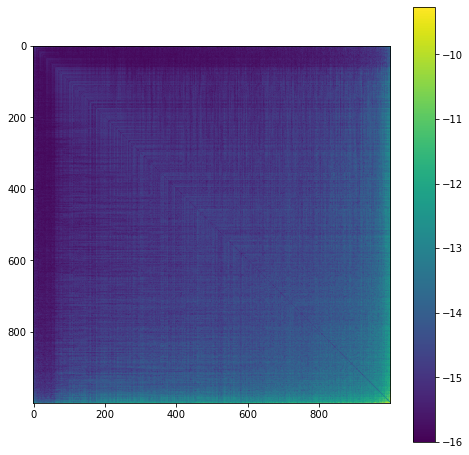

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt

diff_gs = np.abs(Q_gs.T @ Q_gs - ident)
diff_mgs = np.abs(Q_mgs.T @ Q_mgs - ident)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
t = ax.imshow(np.log10(diff_gs + 1E-16))
fig.colorbar(t)

4.440892098500626e-16